#Accessing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [3]:
df0 = pd.read_csv('https://archive.ics.uci.edu/static/public/492/data.csv')
df = pd.read_csv('https://raw.githubusercontent.com/ravi-shankar-verma/Metro-Interstate-Analysis/refs/heads/main/cleaned_data_metro_interstate_traffic_volume')

#EDA

##Summary Statistics

<details>
  <summary><font size="3" color="#ADD8E6"><b>Dataset Information</b></font></summary>
  
  **Dataset Source:**  [Metro Interstate Traffic Volume](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)
  
  **Description:** Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.
</details>

<details>
  <summary><font size="3" color="#ADD8E6"><b>Feature Attributes</b></font></summary>
  
  | Variable Name       | Role     | Type          | Description                                               | Units  | Missing Values |
  |---------------------|----------|---------------|-----------------------------------------------------------|--------|----------------|
  | **holiday**         | Feature  | Categorical   | US National holidays plus regional holiday, Minnesota State Fair | None   | No             |
  | **temp**            | Feature  | Continuous    | Average temp in Kelvin                                    | Kelvin | No             |
  | **rain_1h**         | Feature  | Continuous    | Amount in mm of rain that occurred in the hour            | mm     | No             |
  | **snow_1h**         | Feature  | Continuous    | Amount in mm of snow that occurred in the hour            | mm     | No             |
  | **clouds_all**      | Feature  | Integer       | Percentage of cloud cover                                 | %      | No             |
  | **weather_main**    | Feature  | Categorical   | Short textual description of the current weather          | None   | No             |
  | **weather_description** | Feature  | Categorical   | Longer textual description of the current weather         | None   | No             |
  | **date_time**       | Feature  | Date          | Hour of the data collected in local CST time              | None   | No             |
  | **traffic_volume**  | Target   | Integer       | Hourly I-94 ATR 301 reported westbound traffic volume     | None   | No             |
  
</details>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48187 entries, 0 to 48186
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48187 non-null  object 
 1   temp                 48187 non-null  float64
 2   rain_1h              48187 non-null  float64
 3   snow_1h              48187 non-null  float64
 4   clouds_all           48187 non-null  int64  
 5   weather_main         48187 non-null  object 
 6   weather_description  48187 non-null  object 
 7   date_time            48187 non-null  object 
 8   traffic_volume       48187 non-null  int64  
 9   date                 48187 non-null  object 
 10  year                 48187 non-null  int64  
 11  month                48187 non-null  int64  
 12  week                 48187 non-null  int64  
 13  day                  48187 non-null  int64  
 14  hour                 48187 non-null  int64  
 15  day_of_week          48187 non-null 

In [ ]:
df.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0  No Holiday  288.28      0.0      0.0          40       Clouds   
1  No Holiday  289.36      0.0      0.0          75       Clouds   
2  No Holiday  289.58      0.0      0.0          90       Clouds   
3  No Holiday  290.13      0.0      0.0          90       Clouds   
4  No Holiday  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume        date  year  \
0              cloudy  2012-10-02 09:00:00            5545  2012-10-02  2012   
1              cloudy  2012-10-02 10:00:00            4516  2012-10-02  2012   
2              cloudy  2012-10-02 11:00:00            4767  2012-10-02  2012   
3              cloudy  2012-10-02 12:00:00            5026  2012-10-02  2012   
4              cloudy  2012-10-02 13:00:00            4918  2012-10-02  2012   

   month  week  day  hour day_of_week  
0     10    40    2     9     Tuesday  
1     10    40    2    10     Tuesday  
2     10    40    2    11     Tuesday  
3     10    40    2    12     Tuesday  
4     10    40    2    13     Tuesday

In [ ]:
df.describe(include='all')

holiday          temp       rain_1h       snow_1h    clouds_all  \
count        48187  48187.000000  48187.000000  48187.000000  48187.000000   
unique          12           NaN           NaN           NaN           NaN   
top     No Holiday           NaN           NaN           NaN           NaN   
freq         46759           NaN           NaN           NaN           NaN   
mean           NaN    281.204995      0.334382      0.000222     49.365451   
std            NaN     13.338738     44.797033      0.008169     39.015213   
min            NaN      0.000000      0.000000      0.000000      0.000000   
25%            NaN    272.160000      0.000000      0.000000      1.000000   
50%            NaN    282.450000      0.000000      0.000000     64.000000   
75%            NaN    291.806000      0.000000      0.000000     90.000000   
max            NaN    310.070000   9831.300000      0.510000    100.000000   

       weather_main weather_description            date_time  traffic_volume  \
count         48187               48187                48187    48187.000000   
unique           11                   6                40575             NaN   
top          Clouds              cloudy  2013-04-18 22:00:00             NaN   
freq          15158               15158                    6             NaN   
mean            NaN                 NaN                  NaN     3259.618134   
std             NaN                 NaN                  NaN     1986.954465   
min             NaN                 NaN                  NaN        0.000000   
25%             NaN                 NaN                  NaN     1192.500000   
50%             NaN                 NaN                  NaN     3379.000000   
75%             NaN                 NaN                  NaN     4933.000000   
max             NaN                 NaN                  NaN     7280.000000   

              date          year         month          week           day  \
count        48187  48187.000000  48187.000000  48187.000000  48187.000000   
unique        1860           NaN           NaN           NaN           NaN   
top     2012-12-16           NaN           NaN           NaN           NaN   
freq            81           NaN           NaN           NaN           NaN   
mean           NaN   2015.512047      6.505240     26.483865     15.736402   
std            NaN      1.893393      3.400285     14.842820      8.721687   
min            NaN   2012.000000      1.000000      1.000000      1.000000   
25%            NaN   2014.000000      4.000000     14.000000      8.000000   
50%            NaN   2016.000000      7.000000     27.000000     16.000000   
75%            NaN   2017.000000      9.000000     39.000000     23.000000   
max            NaN   2018.000000     12.000000     53.000000     31.000000   

                hour day_of_week  
count   48187.000000       48187  
unique           NaN           7  
top              NaN      Monday  
freq             NaN        7071  
mean       11.397742         NaN  
std         6.940373         NaN  
min         0.000000         NaN  
25%         5.000000         NaN  
50%        11.000000         NaN  
75%        17.000000         NaN  
max        23.000000         NaN

In [ ]:
df.shape

(48187, 16)

##Univariate

<summary><font size="3" color="#ADD8E6"><b>Distribution Analysis</b></font></summary>

*   For a quick and brief overview of Data distributions
*   Combined Histogram and Barplots.

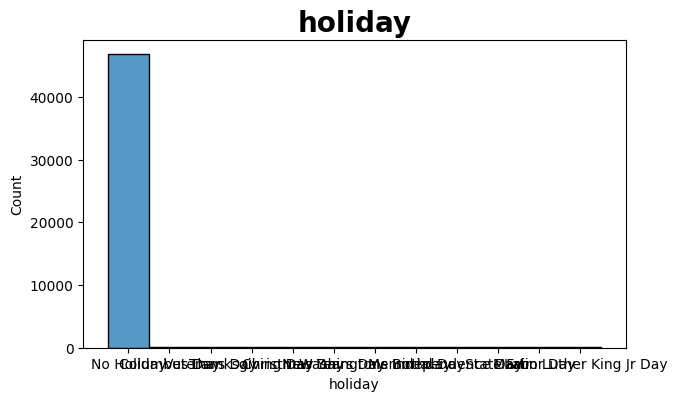

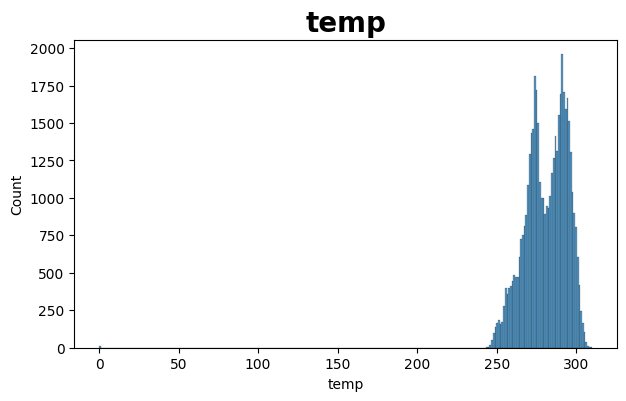

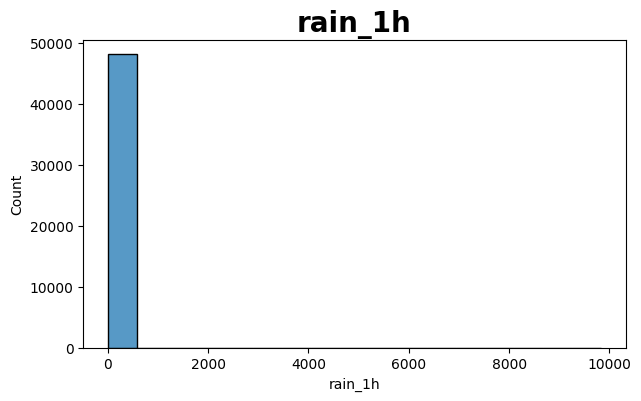

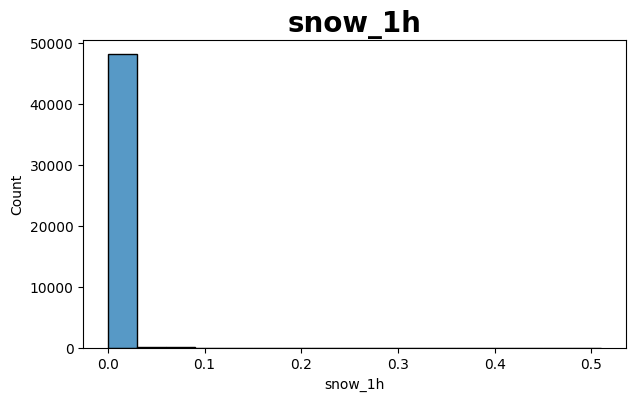

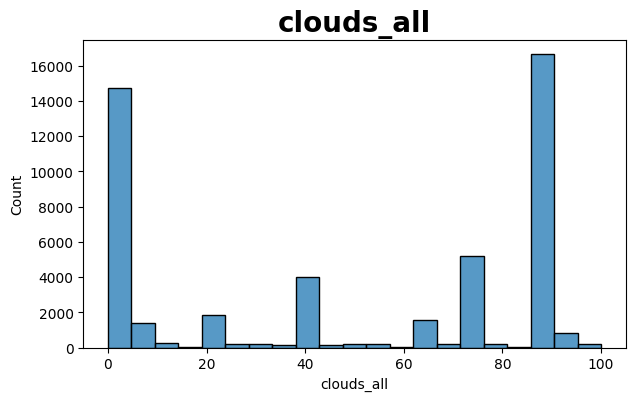

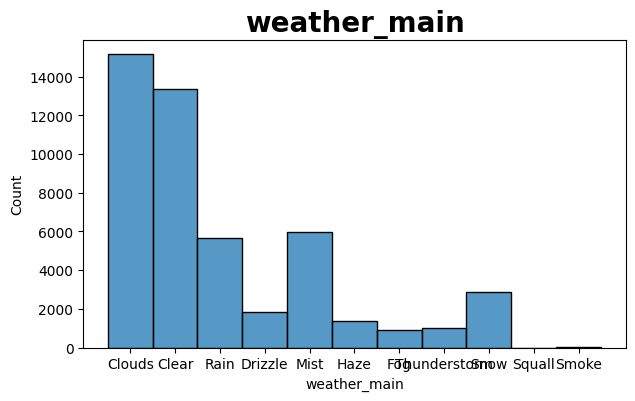

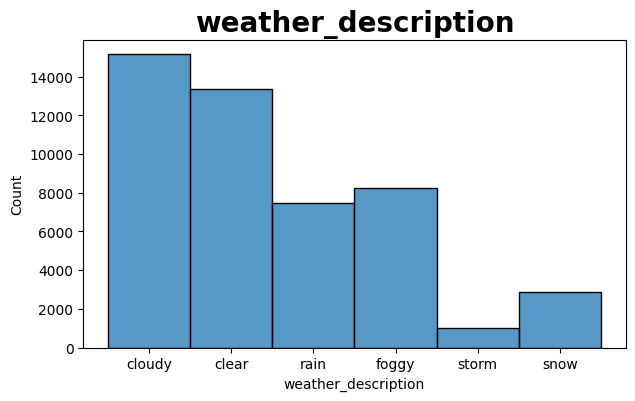

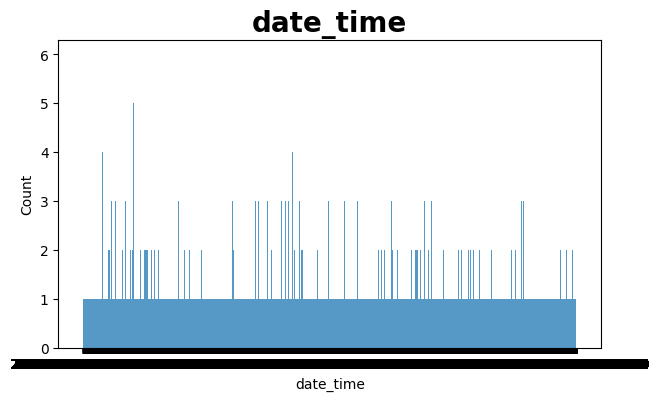

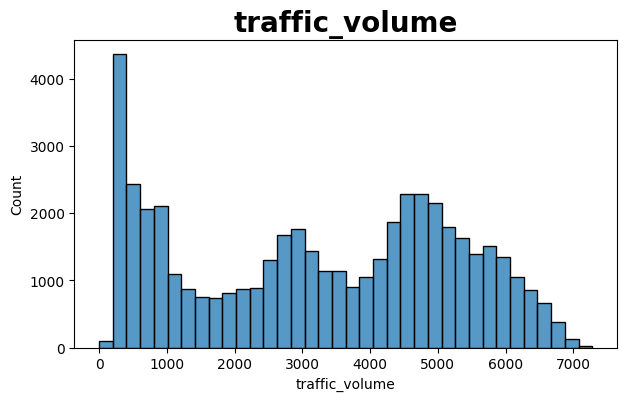

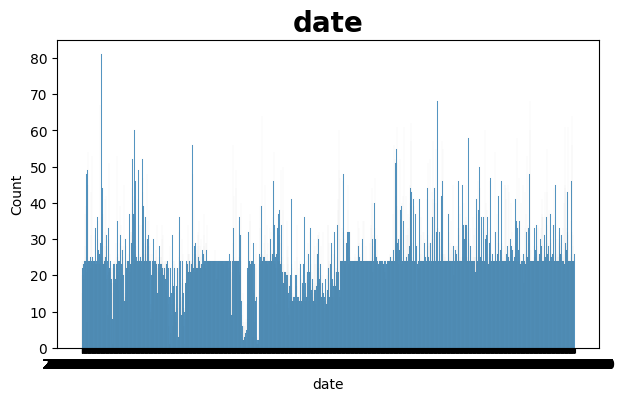

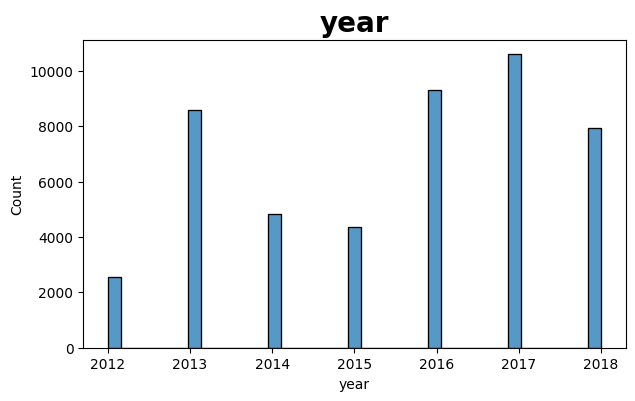

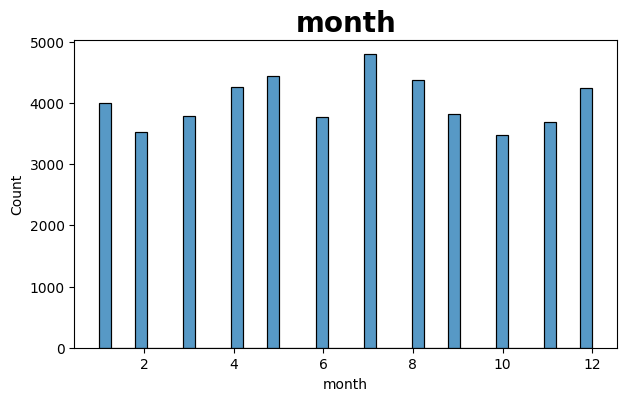

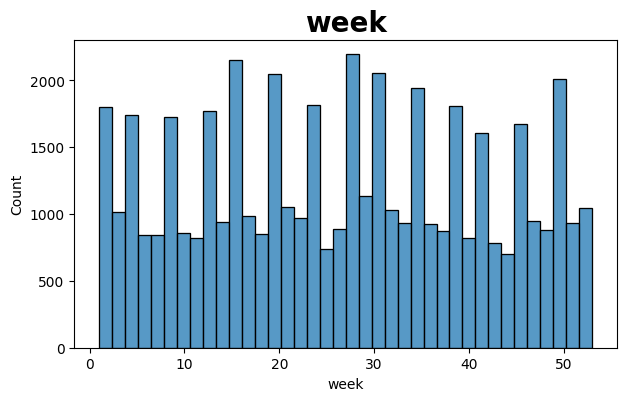

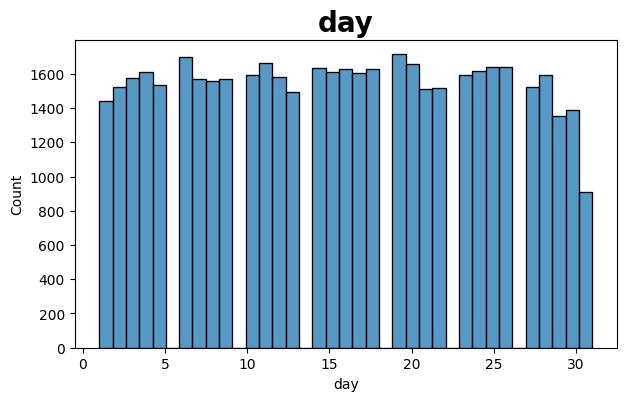

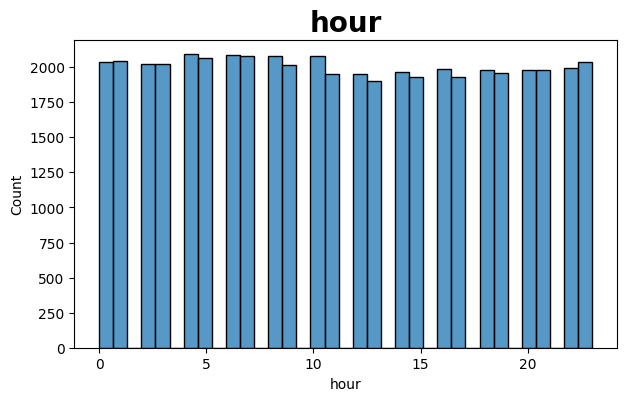

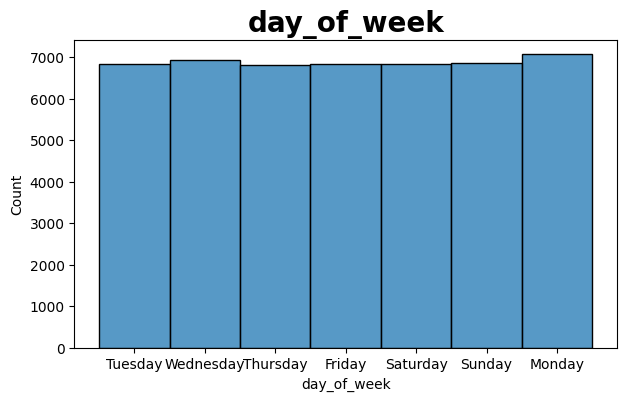

In [ ]:
for feat in df.columns:
  plt.figure(figsize=(7,4))
  sns.histplot(data=df,
               x = feat)
  plt.title(feat, fontsize=20, fontweight='bold')

##Correlation Matrix

<summary><font size="3" color="#ADD8E6"><b>Correlation Matrix</b></font></summary>

*   To easily observe correlations that might be worth exploring.

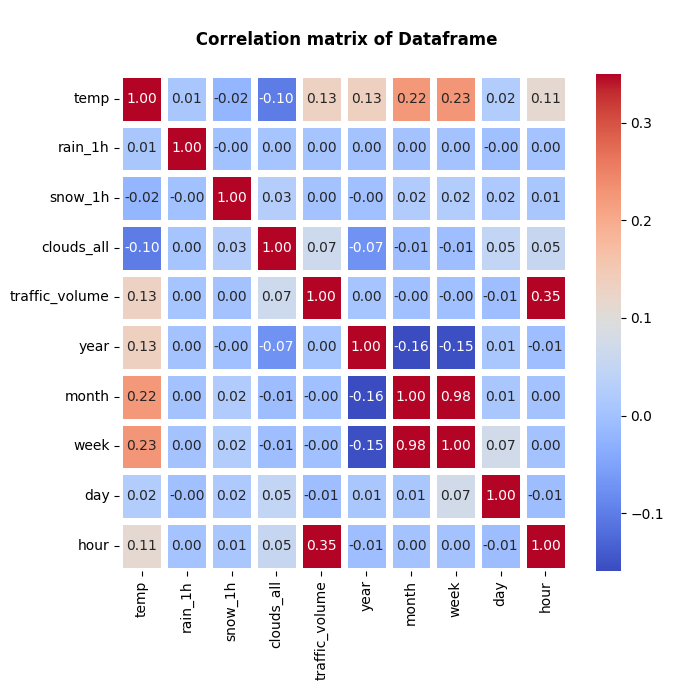

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', lw = 5, fmt='.2f', vmax=0.35)
plt.title('\n Correlation matrix of Dataframe\n', fontweight='bold')
plt.tight_layout()

#Feature Engineering

##Target Variable

<summary><font size="3" color="#ADD8E6"><b>No need to manipulate target variable for regression problem.</b></font></summary>

In [ ]:
df['traffic_volume'].dtype

dtype('int64')

##Binary Encoding

<summary><font size="3" color="#ADD8E6"><b>I will binary encode all 0 values in the following columns:</b></font></summary>

* Rain_1h = No Rain
* Snow_1h = No Snow

In [ ]:
(df['rain_1h'] == 0).value_counts()

rain_1h
True     44720
False     3467
Name: count, dtype: int64

In [ ]:
(df['snow_1h'] == 0).value_counts()

snow_1h
True     48124
False       63
Name: count, dtype: int64

In [5]:
df['no_rain'] = (df['rain_1h'] == 0).astype(int)
df['no_snow'] = (df['snow_1h'] == 0).astype(int)

In [6]:
df['no_rain'].value_counts()

no_rain
1    44720
0     3467
Name: count, dtype: int64

In [7]:
df['no_snow'].value_counts()

no_snow
1    48124
0       63
Name: count, dtype: int64

##Outlier Management

<summary><font size="3" color="#ADD8E6"><b>I use an interactive, combined histogram & boxplot to truncate outliers.</b></font></summary>

+ Temp = Clip lower & upper values (specifically clipping the 0 values identified during preprocessing).
+ Rain_1h = Specifically clipping the extreme upper outlier, also identified earlier.

In [ ]:
def hist_boxplot(df, feature, height=400, width=600, bins=50):

    fig = px.histogram(
        df,
        x=feature,
        nbins=bins,
        marginal='box',
        title=f'{feature} Distribution',
        height=height,
        width=width
    )

    fig.update_layout(
        title_x=0.45,
        margin=dict(l=20, r=20, t=50, b=20)
    )

    fig.show()

<summary><font size="3" color="#ADD8E6"><b>Temp (Before Truncation)</b></font></summary>

In [ ]:
hist_boxplot(df, 'temp')

<summary><font size="3" color="#ADD8E6"><b>Temp (After Truncation)</b></font></summary>

In [ ]:
df['temp'] = df['temp'].clip(lower=246, upper=305)
hist_boxplot(df, 'temp')

<summary><font size="3" color="#ADD8E6"><b>Rain (Before Truncation)</b></font></summary>

In [ ]:
hist_boxplot(df, 'rain_1h')

<summary><font size="3" color="#ADD8E6"><b>Rain (After Truncation)</b></font></summary>

In [ ]:
df['rain_1h'] = df['rain_1h'].clip(upper=1.74)
hist_boxplot(df, 'rain_1h')

##Bucketizing

<summary><font size="3" color="#ADD8E6"><b>Bucketizing Temperature as I previously identified an observable correlation during EDA.</b></font></summary>

In [ ]:
df['temp_bin'] = pd.qcut(df['temp'], q=4, labels=False)

In [ ]:
df['temp_bin'].value_counts()

temp_bin
0    12049
1    12048
2    12045
3    12045
Name: count, dtype: int64

##Integer Encoding

A necessary step to make data usable for modeling. I will int encode the following features:
+ Holiday
+ Weather
+ Day of Week

<summary><font size="3" color="#ADD8E6"><b>Holiday</b></font></summary>


| Holiday Name                   | Code |
|--------------------------------|------|
| **No Holiday**                 | 0    |
| **Columbus Day**               | 1    |
| **Veterans Day**               | 2    |
| **Thanksgiving Day**           | 3    |
| **Christmas Day**              | 4    |
| **New Year's Day**             | 5    |
| **Washington's Birthday**      | 6    |
| **Memorial Day**               | 7    |
| **Independence Day**           | 8    |
| **State Fair**                 | 9    |
| **Labor Day**                  | 10   |
| **Martin Luther King Jr. Day** | 11   |


In [ ]:
holidays = df['holiday'].unique().tolist()

In [ ]:
holiday_to_number = {}
for i, holiday in enumerate(holidays):
  holiday_to_number[holiday] = i
holiday_to_number

{'No Holiday': 0,
 'Columbus Day': 1,
 'Veterans Day': 2,
 'Thanksgiving Day': 3,
 'Christmas Day': 4,
 'New Years Day': 5,
 'Washingtons Birthday': 6,
 'Memorial Day': 7,
 'Independence Day': 8,
 'State Fair': 9,
 'Labor Day': 10,
 'Martin Luther King Jr Day': 11}

In [ ]:
df['holiday_int'] = df['holiday'].map(holiday_to_number)
df['holiday_int'].value_counts().sort_index()

holiday_int
0     46759
1       112
2       120
3       135
4       167
5       114
6       136
7       134
8       126
9       120
10      157
11      107
Name: count, dtype: int64

<summary><font size="3" color="#ADD8E6"><b>Weather</b></font></summary>

| Weather Condition | Code |
|-------------------|------|
| Cloudy           | 0    |
| Clear            | 1    |
| Rain             | 2    |
| Foggy            | 3    |
| Storm            | 4    |
| Snow             | 5    |

In [ ]:
weather_list = df['weather_description'].unique().tolist()

In [ ]:
weather_to_int = {}
for i, weather_description in enumerate(weather_list):
  weather_to_int[weather_description] = i
weather_to_int

{'cloudy': 0, 'clear': 1, 'rain': 2, 'foggy': 3, 'storm': 4, 'snow': 5}

In [ ]:
df['weather_int'] = df['weather_description'].map(weather_to_int)
df['weather_int'].value_counts()

weather_int
0    15158
1    13384
3     8241
2     7490
5     2877
4     1037
Name: count, dtype: int64

<summary><font size="3" color="#ADD8E6"><b>Day of Week</b></font></summary>

| Day        | Code |
|------------|------|
| Tuesday    | 0    |
| Wednesday  | 1    |
| Thursday   | 2    |
| Friday     | 3    |
| Saturday   | 4    |
| Sunday     | 5    |
| Monday     | 6    |

In [ ]:
day_of_week_list = df['day_of_week'].unique().tolist()

In [ ]:
day_of_week_to_int = {}
for i, day_of_week in enumerate(day_of_week_list):
  day_of_week_to_int[day_of_week] = i
day_of_week_to_int

{'Tuesday': 0,
 'Wednesday': 1,
 'Thursday': 2,
 'Friday': 3,
 'Saturday': 4,
 'Sunday': 5,
 'Monday': 6}

In [ ]:
df['day_of_week_int'] = df['day_of_week'].map(day_of_week_to_int)
df['day_of_week_int'].value_counts().sort_index()

day_of_week_int
0    6844
1    6926
2    6816
3    6830
4    6830
5    6870
6    7071
Name: count, dtype: int64

##One Hot encoding

*To avoid multicollinearity, I drop the first value. This will not be necessary with Tree based regression models.*

In [ ]:
df = pd.get_dummies(df, columns=['day_of_week','weather_description','holiday'], drop_first=True)

In [ ]:
df[df.select_dtypes('bool').columns] = df.select_dtypes('bool').astype(int)

##Engineered Dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48187 entries, 0 to 48186
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temp                               48187 non-null  float64
 1   rain_1h                            48187 non-null  float64
 2   snow_1h                            48187 non-null  float64
 3   clouds_all                         48187 non-null  int64  
 4   weather_main                       48187 non-null  object 
 5   date_time                          48187 non-null  object 
 6   traffic_volume                     48187 non-null  int64  
 7   date                               48187 non-null  object 
 8   year                               48187 non-null  int64  
 9   month                              48187 non-null  int64  
 10  week                               48187 non-null  int64  
 11  day                                48187 non-null  int

### A/B Testing Split

*I split the dataframe into an A and B at this stage. A will be as close to an un-engineered dataframe as possible. B will feature the full feature engineering detailed above.*

*The Purpose for doing this is to see if the feature engineering is providing value to the model's performance.*

<summary><font size="3" color="#ADD8E6"><b>A Split (Minimal Feature Engineering)</b></font></summary>

In [ ]:
dfa_features = ['temp',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'year',
 'month',
 'week',
 'day',
 'hour',
 'holiday_int',
 'weather_int'
]

In [ ]:
dfa = df[dfa_features]

In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48187 entries, 0 to 48186
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temp         48187 non-null  float64
 1   rain_1h      48187 non-null  float64
 2   snow_1h      48187 non-null  float64
 3   clouds_all   48187 non-null  int64  
 4   year         48187 non-null  int64  
 5   month        48187 non-null  int64  
 6   week         48187 non-null  int64  
 7   day          48187 non-null  int64  
 8   hour         48187 non-null  int64  
 9   holiday_int  48187 non-null  int64  
 10  weather_int  48187 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 4.0 MB


<summary><font size="3" color="#ADD8E6"><b>B Split (Full Feature Engineering)</b></font></summary>

In [ ]:
dfb = df.drop(['holiday_int','weather_int','weather_main','date_time','date','day_of_week_int'], axis=1)

In [ ]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48187 entries, 0 to 48186
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temp                               48187 non-null  float64
 1   rain_1h                            48187 non-null  float64
 2   snow_1h                            48187 non-null  float64
 3   clouds_all                         48187 non-null  int64  
 4   traffic_volume                     48187 non-null  int64  
 5   year                               48187 non-null  int64  
 6   month                              48187 non-null  int64  
 7   week                               48187 non-null  int64  
 8   day                                48187 non-null  int64  
 9   hour                               48187 non-null  int64  
 10  no_rain                            48187 non-null  int64  
 11  no_snow                            48187 non-null  int

#Modeling - Linear Regression (A)

###Assigning X & y

In [ ]:
features_a = [feat for feat in dfa.columns if feat not in ['traffic_volume']]
target_a = ['traffic_volume']

Xa = dfa[features_a]
ya = dfa[target_a]

###Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xa_tr, Xa_ts, ya_tr, ya_ts = train_test_split(Xa, ya, test_size=.25, random_state=42)

In [ ]:
print(f"""Train Test Split Shape (A):
X_train: {Xa_tr.shape} | X_test: {Xa_ts.shape}
y_train: {ya_tr.shape} | y_test: {ya_ts.shape}""")

Train Test Split Shape (A):
X_train: (36140, 12) | X_test: (12047, 12)
y_train: (36140, 1) | y_test: (12047, 1)


###Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
dfa.describe()

temp       rain_1h       snow_1h    clouds_all  traffic_volume  \
count  48187.000000  48187.000000  48187.000000  48187.000000    48187.000000   
mean     281.253522      0.063792      0.000222     49.365451     3259.618134   
std       12.712553      0.282719      0.008169     39.015213     1986.954465   
min      246.000000      0.000000      0.000000      0.000000        0.000000   
25%      272.160000      0.000000      0.000000      1.000000     1192.500000   
50%      282.450000      0.000000      0.000000     64.000000     3379.000000   
75%      291.806000      0.000000      0.000000     90.000000     4933.000000   
max      305.000000      1.740000      0.510000    100.000000     7280.000000   

               year         month          week           day          hour  \
count  48187.000000  48187.000000  48187.000000  48187.000000  48187.000000   
mean    2015.512047      6.505240     26.483865     15.736402     11.397742   
std        1.893393      3.400285     14.842820      8.721687      6.940373   
min     2012.000000      1.000000      1.000000      1.000000      0.000000   
25%     2014.000000      4.000000     14.000000      8.000000      5.000000   
50%     2016.000000      7.000000     27.000000     16.000000     11.000000   
75%     2017.000000      9.000000     39.000000     23.000000     17.000000   
max     2018.000000     12.000000     53.000000     31.000000     23.000000   

           temp_bin   holiday_int   weather_int  
count  48187.000000  48187.000000  48187.000000  
mean       1.499844      0.178139      1.486293  
std        1.118055      1.149701      1.437571  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        1.000000      0.000000      1.000000  
75%        2.000000      0.000000      3.000000  
max        3.000000     11.000000      5.000000

In [ ]:
std_scaler = StandardScaler().fit(Xa_tr)
Xa_tr = std_scaler.transform(Xa_tr)
Xa_ts = std_scaler.transform(Xa_ts)

##Linear Regression (A)

In [ ]:
reg_a = LinearRegression()
reg_a.fit(Xa_tr, ya_tr)
pred_a = reg_a.predict(Xa_ts)

###Scores

<summary><font size="3" color="#ADD8E6"><b>R2</b></font></summary>

In [ ]:
train_score_reg_a = reg_a.score(Xa_tr, ya_tr)
test_score_reg_a = reg_a.score(Xa_ts, ya_ts)
print(f'Train Score Reg = {train_score_reg_a}')
print(f'Test Score Reg = {test_score_reg_a}')

train_score_reg = 0.1437742407351753
test_score_reg = 0.14782303319653234


<summary><font size="3" color="#ADD8E6"><b>Adjusted R2</b></font></summary>

*I use an adjusted R2 to account for overfitting from additional features. Even though this (A) split does not use many additional features, I use it across both (A) & (B) Tests for consistency.*

In [ ]:
def adjusted_r_squared(r_squared, n, k):
    print(f'R Squared = {r_squared}')
    print(f'Rows = {n}')
    print(f'Features = {k}')
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
    print(f'Adjusted R2 = {adjusted_r_squared}')
    return

In [ ]:
adjusted_score_reg_a = adjusted_r_squared(test_score_reg_a, dfa.shape[0], len(features_a))

r_squared = 0.14782303319653234
rows = 48187
features = 12
adjusted_r_squared = 0.14761075845078475


###Prediction Plot

<Axes: xlabel='traffic_volume'>

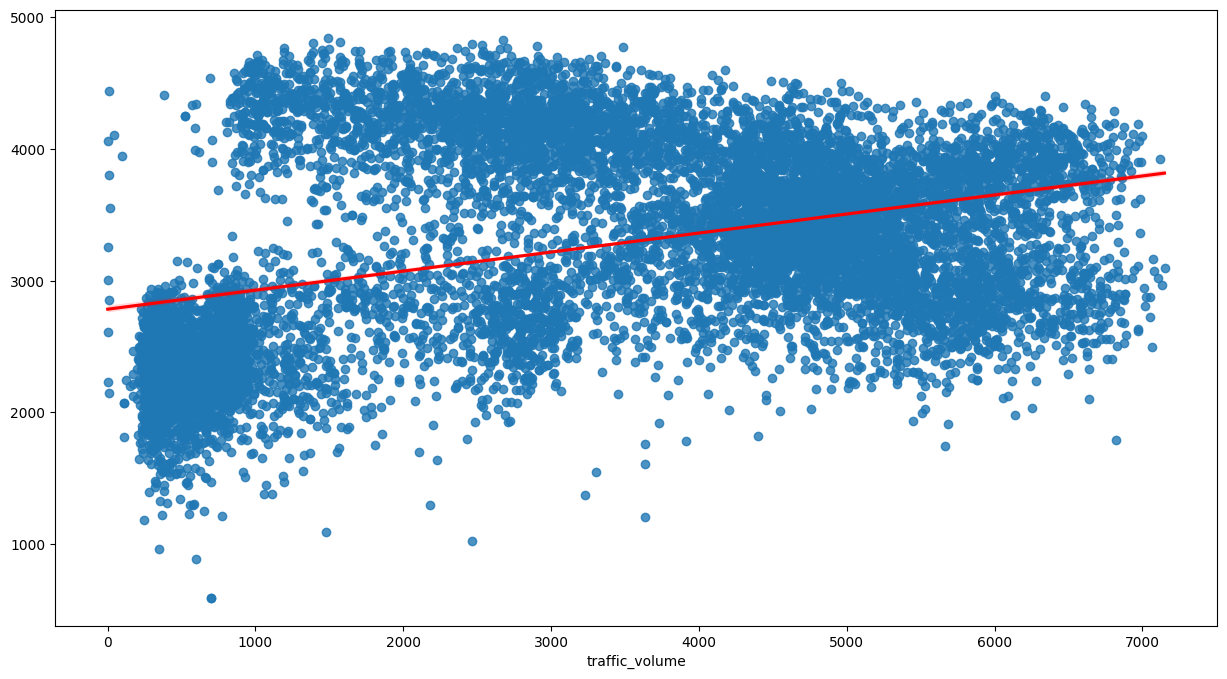

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=ya_ts, y=pred_a, line_kws={'color': 'red'})

###Forward Feature Selection

*I use this to see how few features I could use to achieve 99% of the above R2 score.*

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
forward_feature_selection = SequentialFeatureSelector(reg_a,
                                                      k_features=(len(features_a)),
                                                      forward=True,
                                                      floating=False,
                                                      verbose=2,
                                                      scoring='r2',
                                                      cv=5).fit(Xa_tr, ya_tr)


[2025-02-01 15:18:40] Features: 1/12 -- score: 0.12250722843121926
[2025-02-01 15:18:41] Features: 2/12 -- score: 0.13076586738842982
[2025-02-01 15:18:42] Features: 3/12 -- score: 0.1345508220385276
[2025-02-01 15:18:43] Features: 4/12 -- score: 0.13836606317669672
[2025-02-01 15:18:44] Features: 5/12 -- score: 0.1423862076456232
[2025-02-01 15:18:45] Features: 6/12 -- score: 0.14294691903332388
[2025-02-01 15:18:46] Features: 7/12 -- score: 0.14325282293120128
[2025-02-01 15:18:47] Features: 8/12 -- score: 0.14324424981630482
[2025-02-01 15:18:47] Features: 9/12 -- score: 0.14323339068449542
[2025-02-01 15:18:48] Features: 10/12 -- score: 0.14321724509842476
[2025-02-01 15:18:49] Features: 11/12 -- score: 0.14308067061176938
[2025-02-01 15:18:49] Features: 12/12 -- score: 0.1429329007848414

In [ ]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

feature_idx  \
1                                     (8,)   
2                                   (0, 8)   
3                               (0, 8, 10)   
4                            (0, 3, 8, 10)   
5                        (0, 3, 8, 10, 11)   
6                     (0, 3, 5, 8, 10, 11)   
7                  (0, 1, 3, 5, 8, 10, 11)   
8               (0, 1, 3, 5, 8, 9, 10, 11)   
9            (0, 1, 3, 5, 6, 8, 9, 10, 11)   
10        (0, 1, 3, 5, 6, 7, 8, 9, 10, 11)   
11     (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11)   
12  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)   

                                            cv_scores avg_score  \
1   [0.1200719138345352, 0.11741411739447949, 0.12...  0.122507   
2   [0.1307849638729952, 0.12515578273212435, 0.13...  0.130766   
3   [0.13375248628627046, 0.12769493196045634, 0.1...  0.134551   
4   [0.1371748529264578, 0.13082970741852384, 0.14...  0.138366   
5   [0.1390393112359909, 0.13471832817514706, 0.14...  0.142386   
6   [0.1401209331732215, 0.13531085310530122, 0.14...  0.142947   
7   [0.1402093824150754, 0.1358660814172794, 0.147...  0.143253   
8   [0.14008086527533103, 0.1359974185130679, 0.14...  0.143244   
9   [0.14005354365735745, 0.1360114447057973, 0.14...  0.143233   
10  [0.13996611712137919, 0.1357090886841693, 0.14...  0.143217   
11  [0.13996626926958056, 0.1354378839529642, 0.14...  0.143081   
12  [0.13971757019590558, 0.13503642248012637, 0.1...  0.142933   

                             feature_names  ci_bound   std_dev   std_err  
1                                     (8,)  0.004909  0.003819   0.00191  
2                                   (0, 8)  0.004768   0.00371  0.001855  
3                               (0, 8, 10)  0.005011  0.003898  0.001949  
4                            (0, 3, 8, 10)  0.005783  0.004499   0.00225  
5                        (0, 3, 8, 10, 11)  0.006493  0.005052  0.002526  
6                     (0, 3, 5, 8, 10, 11)  0.006224  0.004843  0.002421  
7                  (0, 1, 3, 5, 8, 10, 11)  0.006076  0.004727  0.002364  
8               (0, 1, 3, 5, 8, 9, 10, 11)  0.006011  0.004676  0.002338  
9            (0, 1, 3, 5, 6, 8, 9, 10, 11)     0.006  0.004668  0.002334  
10        (0, 1, 3, 5, 6, 7, 8, 9, 10, 11)  0.006194  0.004819  0.002409  
11     (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11)  0.006209  0.004831  0.002415  
12  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)   0.00639  0.004972  0.002486

In [ ]:
ffs_graph_a = pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
ffs_graph_a['feature_count'] = ffs_graph_a['feature_idx'].apply(len)

<Axes: xlabel='feature_count', ylabel='avg_score'>

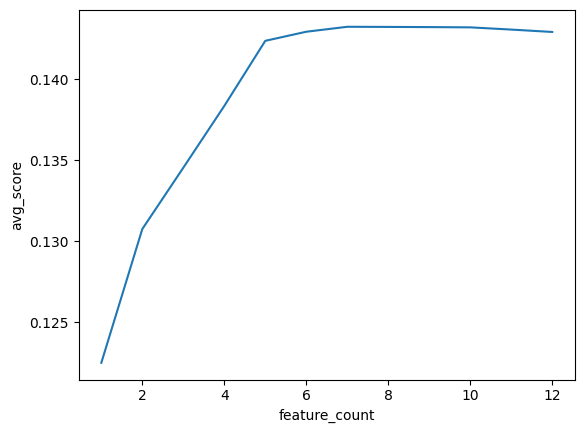

In [ ]:
sns.lineplot(data = ffs_graph_a,
             y = 'avg_score',
             x = 'feature_count')

<summary><font size="3" color="#ADD8E6"><b>Findings</b></font></summary>

*I could use as few as 5 features to capture 99% of the R2 score of the model with all features.*

###Tuning Elastic Net

<summary><font size="3" color="#ADD8E6"><b>Combined L1 & L2 Regularization</b></font></summary>

I use Elastic Net to regularize the model. I achieve this through the following methods to find the best alpha and L1 Ratios.

In [ ]:
train_scores_alpha_a = []
test_scores_alpha_a = []

alphas_a = np.arange(.1, 1.1, .1)

for a in alphas_a:
  regr_a = ElasticNet(alpha=a, l1_ratio=0.5)
  regr_a.fit(Xa_tr, ya_tr)

  train_scores_alpha_a.append(regr_a.score(Xa_tr, ya_tr))
  test_scores_alpha_a.append(regr_a.score(Xa_ts, ya_ts))

dict_scores_alpha_a = {'train score':train_scores_alpha_a, 'test score':test_scores_alpha_a}

dfa_score_alpha_a = pd.DataFrame(dict_scores_alpha_a, index=alphas_a)

<Axes: >

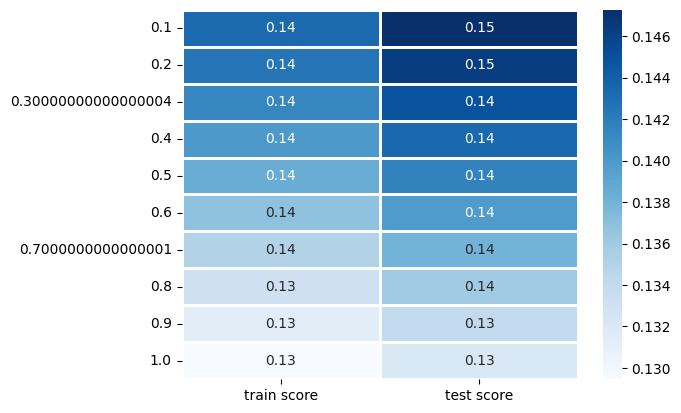

In [ ]:
sns.heatmap(dfa_score_alpha_a, annot=True, cmap='Blues', lw=1)

In [ ]:
train_scores_l1r_a = []
test_scores_l1r_a = []

l1_ratios_a = np.arange(.1, 1.1, .1)

for l in l1_ratios_a:
  regr_a = ElasticNet(alpha=.1, l1_ratio=l)
  regr_a.fit(Xa_tr, ya_tr)

  train_scores_l1r_a.append(regr_a.score(Xa_tr, ya_tr))
  test_scores_l1r_a.append(regr_a.score(Xa_ts, ya_ts))

dict_scores_l1r_a = {'train score':train_scores_l1r_a, 'test score':test_scores_l1r_a}

dfa_score_l1r_a = pd.DataFrame(dict_scores_l1r_a, index=l1_ratios_a)

<Axes: >

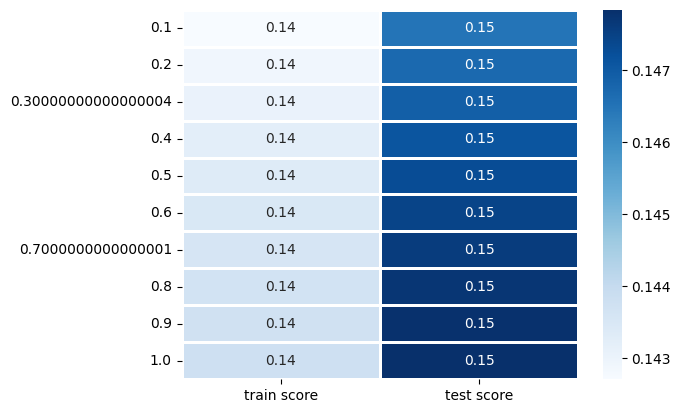

In [ ]:
sns.heatmap(dfa_score_l1r_a, annot=True, cmap='Blues', lw=1)

###Scores

In [ ]:
regr_a = ElasticNet(alpha=.1, l1_ratio=1).fit(Xa_tr, ya_tr)
train_score_regr_a = regr_a.score(Xa_tr, ya_tr)
test_score_regr_a = regr_a.score(Xa_ts, ya_ts)
print(f'train_score_reg = {train_score_regr_a}')
print(f'test_score_reg = {test_score_regr_a}')

train_score_reg = 0.1437738329528171
test_score_reg = 0.14783585740055383


<summary><font size="3" color="#ADD8E6"><b>Results</b></font></summary>

No improvement achieved via regularization.

#Modeling - Linear Regression (B)

###Assigning X & y

In [ ]:
features_b = [feat for feat in dfb.columns if feat not in ['traffic_volume']]
target_b = ['traffic_volume']

Xb = dfb[features_b]
yb = dfb[target_b]

###Train Test Split

In [ ]:
Xb_tr, Xb_ts, yb_tr, yb_ts = train_test_split(Xb, yb, test_size=.25, random_state=42)

In [ ]:
print(f"""Train Test Split Shape:
X_train: {Xb_tr.shape} | X_test: {Xb_ts.shape}
y_train: {yb_tr.shape} | y_test: {yb_ts.shape}""")

Train Test Split Shape:
X_train: (36140, 34) | X_test: (12047, 34)
y_train: (36140, 1) | y_test: (12047, 1)


###Standardization

In [ ]:
std_scaler = StandardScaler().fit(Xb_tr)
Xb_tr = std_scaler.transform(Xb_tr)
Xb_ts = std_scaler.transform(Xb_ts)

##Linear Regression (B)

In [ ]:
reg_b = LinearRegression()
reg_b.fit(Xb_tr, yb_tr)
pred_b = reg_b.predict(Xb_ts)

###Scores

<summary><font size="3" color="#ADD8E6"><b>R2</b></font></summary>

In [ ]:
train_score_reg_b = reg_b.score(Xb_tr, yb_tr)
test_score_reg_b = reg_b.score(Xb_ts, yb_ts)
print(f'train_score_reg = {train_score_reg_b}')
print(f'test_score_reg = {test_score_reg_b}')

train_score_reg = 0.20583966279398214
test_score_reg = 0.20226336624952013


<summary><font size="3" color="#ADD8E6"><b>Adjusted R2</b></font></summary>

In [ ]:
adjusted_score_reg_b = adjusted_r_squared(test_score_reg_b, dfb.shape[0], len(features_b))

r_squared = 0.20226336624952013
rows = 48187
features = 34
adjusted_r_squared = 0.2017000865197578


###Prediction Plot

<Axes: xlabel='traffic_volume'>

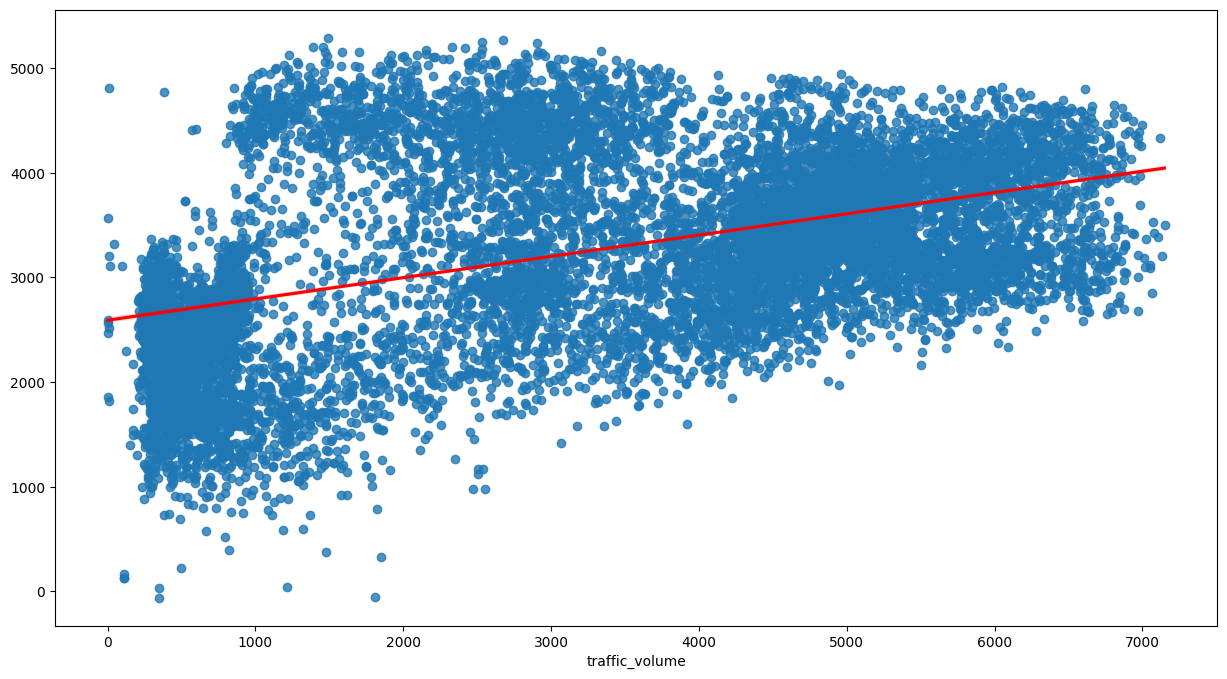

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=yb_ts, y=pred_b, line_kws={'color': 'red'})

###Forward Feature Selection

In [ ]:
forward_feature_selection = SequentialFeatureSelector(reg_b,
                                                      k_features=(len(features_b)),
                                                      forward=True,
                                                      floating=False,
                                                      verbose=2,
                                                      scoring='r2',
                                                      cv=5).fit(Xb_tr, yb_tr)


[2025-02-01 15:18:55] Features: 1/34 -- score: 0.12250722843121926
[2025-02-01 15:18:58] Features: 2/34 -- score: 0.15634244656233323
[2025-02-01 15:19:00] Features: 3/34 -- score: 0.17411524674981002
[2025-02-01 15:19:02] Features: 4/34 -- score: 0.1825036179202078
[2025-02-01 15:19:04] Features: 5/34 -- score: 0.19009323094794
[2025-02-01 15:19:08] Features: 6/34 -- score: 0.19776670621635625
[2025-02-01 15:19:14] Features: 7/34 -- score: 0.1990013262807605
[2025-02-01 15:19:18] Features: 8/34 -- score: 0.20024389793134084
[2025-02-01 15:19:22] Features: 9/34 -- score: 0.2008482853982141
[2025-02-01 15:19:30] Features: 10/34 -- score: 0.20151490547413492
[2025-02-01 15:19:34] Features: 11/34 -- score: 0.20207277766101478
[2025-02-01 15:19:38] Features: 12/34 -- score: 0.20262964937564926
[2025-02-01 15:19:45] Features: 13/34 -- score: 0.2030656173336845
[2025-02-01 15:19:51] Features: 14/34 -- score: 0.20349768600395396
[2025-02-01 15:19:57] Features: 15/34 -- score: 0.2038376785536

In [ ]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

feature_idx  \
1                                                (8,)   
2                                             (8, 14)   
3                                         (8, 13, 14)   
4                                      (0, 8, 13, 14)   
5                                  (0, 8, 13, 14, 18)   
6                              (0, 8, 13, 14, 18, 29)   
7                          (0, 8, 12, 13, 14, 18, 29)   
8                       (0, 3, 8, 12, 13, 14, 18, 29)   
9                   (0, 3, 8, 12, 13, 14, 18, 29, 30)   
10              (0, 3, 8, 12, 13, 14, 18, 23, 29, 30)   
11          (0, 3, 8, 12, 13, 14, 18, 23, 29, 30, 32)   
12      (0, 3, 8, 12, 13, 14, 18, 22, 23, 29, 30, 32)   
13  (0, 3, 8, 12, 13, 14, 16, 18, 22, 23, 29, 30, 32)   
14  (0, 3, 5, 8, 12, 13, 14, 16, 18, 22, 23, 29, 3...   
15  (0, 3, 5, 8, 12, 13, 14, 16, 18, 22, 23, 29, 3...   
16  (0, 3, 5, 8, 12, 13, 14, 16, 18, 22, 23, 26, 2...   
17  (0, 1, 3, 5, 8, 12, 13, 14, 16, 18, 22, 23, 26...   
18  (0, 1, 3, 5, 8, 9, 12, 13, 14, 16, 18, 22, 23,...   
19  (0, 1, 3, 5, 8, 9, 12, 13, 14, 16, 18, 20, 22,...   
20  (0, 1, 3, 5, 8, 9, 12, 13, 14, 16, 18, 20, 22,...   
21  (0, 1, 3, 5, 8, 9, 12, 13, 14, 16, 18, 20, 22,...   
22  (0, 1, 3, 5, 8, 9, 12, 13, 14, 16, 18, 20, 22,...   
23  (0, 1, 3, 5, 8, 9, 12, 13, 14, 16, 17, 18, 20,...   
24  (0, 1, 3, 5, 8, 9, 12, 13, 14, 16, 17, 18, 20,...   
25  (0, 1, 3, 5, 8, 9, 10, 12, 13, 14, 16, 17, 18,...   
26  (0, 1, 3, 5, 7, 8, 9, 10, 12, 13, 14, 16, 17, ...   
27  (0, 1, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 1...   
28  (0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
29  (0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
30  (0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
31  (0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
32  (0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
33  (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
34  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                            cv_scores avg_score  \
1   [0.1200719138345352, 0.11741411739447949, 0.12...  0.122507   
2   [0.155360196787115, 0.1543674328573641, 0.1610...  0.156342   
3   [0.1733186913348882, 0.17578229790610767, 0.17...  0.174115   
4   [0.18345243457055316, 0.1836851087318746, 0.18...  0.182504   
5   [0.1877687351959102, 0.19153063986075158, 0.19...  0.190093   
6   [0.19454021730599558, 0.19933699797539384, 0.1...  0.197767   
7   [0.1946588332581305, 0.2000239803567515, 0.201...  0.199001   
8   [0.19581778349412648, 0.20072761932469618, 0.2...  0.200244   
9   [0.1966057874267243, 0.2022801212951676, 0.202...  0.200848   
10  [0.1972803331821068, 0.2028165736461781, 0.203...  0.201515   
11  [0.1981256742232822, 0.20296120450983268, 0.20...  0.202073   
12  [0.19848519918035712, 0.2031462712551234, 0.20...   0.20263   
13  [0.19929107811403535, 0.20318156940820986, 0.2...  0.203066   
14  [0.20020134724217153, 0.20369713425022473, 0.2...  0.203498   
15  [0.2001844479860263, 0.20400815061160216, 0.20...  0.203838   
16  [0.20114599636861574, 0.20494622081559222, 0.2...  0.204264   
17  [0.201087699449485, 0.20515472590082773, 0.204...  0.204346   
18  [0.2012891551284015, 0.2049640180665413, 0.205...  0.204465   
19  [0.201526980712889, 0.20537305680374196, 0.205...  0.204569   
20  [0.20153024930642816, 0.2054298026245176, 0.20...  0.204591   
21  [0.20161332080199124, 0.20549022564547437, 0.2...  0.204605   
22  [0.20163967898238477, 0.20550713327633763, 0.2...  0.204633   
23  [0.20140662433087053, 0.20532543787941715, 0.2...  0.204649   
24  [0.20139841954578053, 0.2053285038569801, 0.20...  0.204642   
25  [0.20143541207060423, 0.20529771120917506, 0.2...  0.204621   
26  [0.20142465907098595, 0.20499477947413391, 0.2...  0.204589   
27  [0.2013274675742317, 0.2050253920676196, 0.205...  0.204567   
28  [0.2012753855258963, 0.2050458888108806, 0.205...  0.204535   
29  [0.201275507779606, 0.20504625966847778, 0.205...  0.204504   
30  [0.20115529682386213, 0.20503885

In [ ]:
ffs_graph_b = pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
ffs_graph_b['feature_count'] = ffs_graph_b['feature_idx'].apply(len)

<Axes: xlabel='feature_count', ylabel='avg_score'>

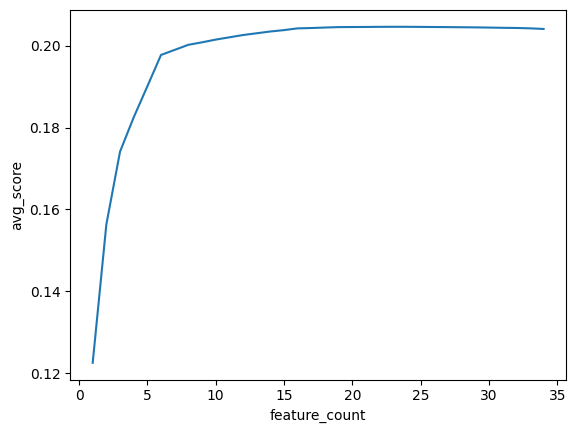

In [ ]:
sns.lineplot(data = ffs_graph_b,
             y = 'avg_score',
             x = 'feature_count')

<summary><font size="3" color="#ADD8E6"><b>Findings</b></font></summary>

*I could use as few as 8 features to capture 99% of the R2 score of the model with all features.*

###Tuning Elastic Net

In [ ]:
train_scores_alpha_b = []
test_scores_alpha_b = []

alphas_b = np.arange(.1, 1.1, .1)

for a in alphas_b:
  regr_b = ElasticNet(alpha=a, l1_ratio=0.5)
  regr_b.fit(Xb_tr, yb_tr)

  train_scores_alpha_b.append(regr_b.score(Xb_tr, yb_tr))
  test_scores_alpha_b.append(regr_b.score(Xb_ts, yb_ts))

dict_scores_alpha_b = {'train score':train_scores_alpha_b, 'test score':test_scores_alpha_b}

dfb_score_alpha_b = pd.DataFrame(dict_scores_alpha_b, index=alphas_b)

<Axes: >

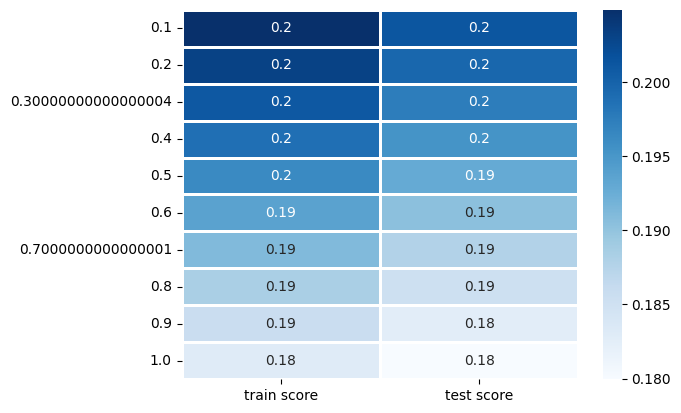

In [ ]:
sns.heatmap(dfb_score_alpha_b, annot=True, cmap='Blues', lw=1)

In [ ]:
train_scores_l1r_b = []
test_scores_l1r_b = []

l1_ratios_b = np.arange(.1, 1.1, .1)

for l in l1_ratios_b:
  regr_b = ElasticNet(alpha=.1, l1_ratio=l)
  regr_b.fit(Xb_tr, yb_tr)

  train_scores_l1r_b.append(regr_b.score(Xb_tr, yb_tr))
  test_scores_l1r_b.append(regr_b.score(Xb_ts, yb_ts))

dict_scores_l1r_b = {'train score':train_scores_l1r_b, 'test score':test_scores_l1r_b}

dfb_score_l1r_b = pd.DataFrame(dict_scores_l1r_b, index=l1_ratios_b)

<Axes: >

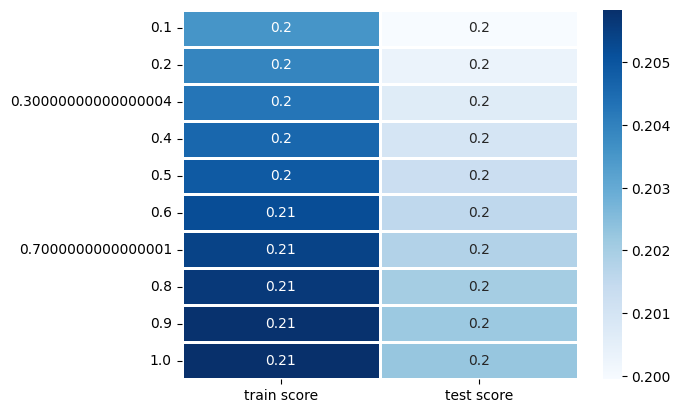

In [ ]:
sns.heatmap(dfb_score_l1r_b, annot=True, cmap='Blues', lw=1)

###Scores

In [ ]:
regr_b = ElasticNet(alpha=.1, l1_ratio=1).fit(Xb_tr, yb_tr)
train_score_regr_b = regr_b.score(Xb_tr, yb_tr)
test_score_regr_b = regr_b.score(Xb_ts, yb_ts)
print(f'train_score_reg = {train_score_regr_b}')
print(f'test_score_reg = {test_score_regr_b}')

train_score_reg = 0.2058390760458355
test_score_reg = 0.20226672661413647


<summary><font size="3" color="#ADD8E6"><b>Results</b></font></summary>

No improvement achieved via regularization.

#Polynomial Transformation

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

I use a polynomial transformation to improve model performance by capturing non-linear relationships and improving the underfitting issue of the above linear regression.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf = PolynomialFeatures(degree=2)

##Linear Regression (A)

In [ ]:
Xa_tr_pf = Xa_tr.copy()
Xa_ts_pf = Xa_ts.copy()
ya_tr_pf = ya_tr.copy()
ya_ts_pf = ya_ts.copy()

In [ ]:
print(f"""Polynomial Transformation Shape:
X_train: {Xa_tr_pf.shape} | X_test: {Xa_ts_pf.shape}
y_train: {ya_tr_pf.shape} | y_test: {ya_ts_pf.shape}""")

Polynomial Transformation Shape:
X_train: (36140, 12) | X_test: (12047, 12)
y_train: (36140, 1) | y_test: (12047, 1)


In [ ]:
Xa_tr_pf = pf.fit_transform(Xa_tr_pf)
Xa_ts_pf = pf.fit_transform(Xa_ts_pf)

In [ ]:
reg_pf_a = LinearRegression()

In [ ]:
reg_pf_a.fit(Xa_tr_pf,ya_tr_pf)

LinearRegression()

In [ ]:
pred_pf_a = reg_pf_a.predict(Xa_ts_pf)
pred_pf_a = pred_pf_a.flatten()

###Scores

In [ ]:
train_score_reg_pf_a = reg_pf_a.score(Xa_tr_pf,ya_tr_pf)
test_score_reg_pf_a = reg_pf_a.score(Xa_ts_pf,ya_ts_pf)
print(f'train_score_reg_pf_a = {train_score_reg_pf_a}')
print(f'test_score_reg_pf_a = {test_score_reg_pf_a}')

train_score_reg_pf_a = 0.6694083436094751
test_score_reg_pf_a = 0.6662809501816034


###Prediction Plot

<Axes: xlabel='traffic_volume'>

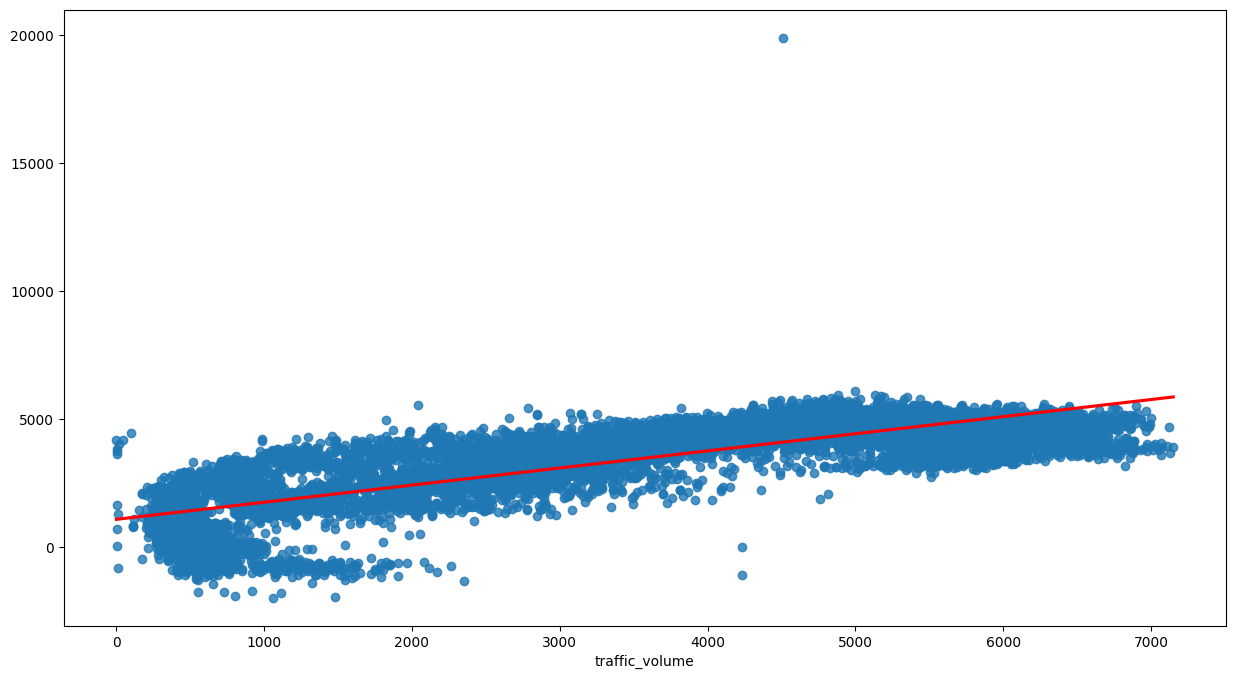

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=ya_ts_pf, y=pred_pf_a, line_kws={'color': 'red'})

##Linear Regression (B)

In [ ]:
Xb_tr_pf = Xb_tr.copy()
Xb_ts_pf = Xb_ts.copy()
yb_tr_pf = yb_tr.copy()
yb_ts_pf = yb_ts.copy()

In [ ]:
print(f"""Polynomial Transformation Shape:
X_train: {Xb_tr_pf.shape} | X_test: {Xb_ts_pf.shape}
y_train: {yb_tr_pf.shape} | y_test: {yb_ts_pf.shape}""")

Polynomial Transformation Shape:
X_train: (36140, 34) | X_test: (12047, 34)
y_train: (36140, 1) | y_test: (12047, 1)


In [ ]:
Xb_tr_pf = pf.fit_transform(Xb_tr_pf)
Xb_ts_pf = pf.fit_transform(Xb_ts_pf)

In [ ]:
reg_pf_b = LinearRegression()

In [ ]:
reg_pf_b.fit(Xb_tr_pf,yb_tr_pf)

LinearRegression()

In [ ]:
pred_pf_b = reg_pf_b.predict(Xb_ts_pf)
pred_pf_b = pred_pf_b.flatten()

###Scores

In [ ]:
train_score_reg_pf_b = reg_pf_b.score(Xb_tr_pf,yb_tr_pf)
test_score_reg_pf_b = reg_pf_b.score(Xb_ts_pf,yb_ts_pf)
print(f'train_score_reg_pf_b = {train_score_reg_pf_b}')
print(f'test_score_reg_pf_b = {test_score_reg_pf_b}')

train_score_reg_pf_b = 0.7245394525628118
test_score_reg_pf_b = 0.7181852261311812


###Prediction Plot

<Axes: xlabel='traffic_volume'>

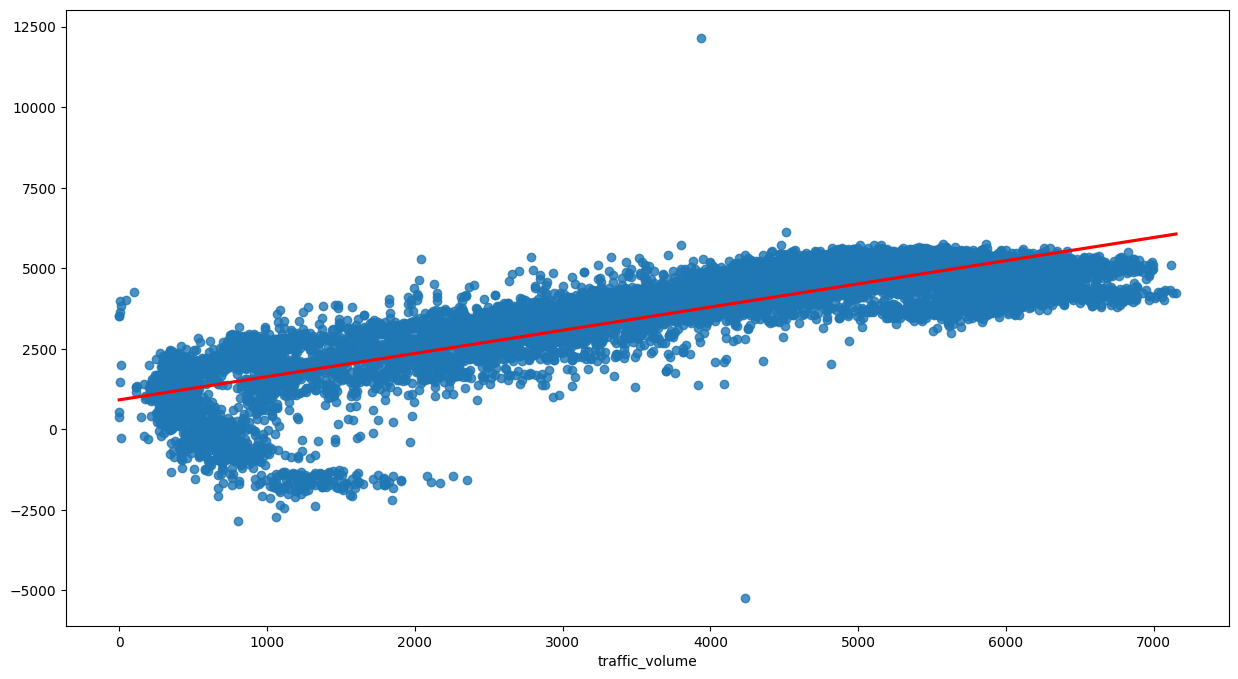

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=yb_ts_pf, y=pred_pf_b, line_kws={'color': 'red'})

#Summary

In [ ]:
train_scores = [train_score_reg_a, train_score_regr_a, train_score_reg_b, train_score_regr_b, train_score_reg_pf_a, train_score_reg_pf_b]
test_scores = [test_score_reg_a, test_score_regr_a, test_score_reg_b, test_score_regr_b, test_score_reg_pf_a, test_score_reg_pf_b]
model = ['Regression A', 'Elastic Net A', 'Regression B', 'Elastic Net B', 'Poly Transformation A', 'Poly Transformation B']

dict_scores = {'train_scores':train_scores, 'test score': test_scores}

In [ ]:
pd.DataFrame(dict_scores, index=model).sort_values('test score', ascending=False)

train_scores  test score
Poly Transformation B      0.724539    0.718185
Poly Transformation A      0.669408    0.666281
Elastic Net B              0.205839    0.202267
Regression B               0.205840    0.202263
Elastic Net A              0.143774    0.147836
Regression A               0.143774    0.147823

<summary><font size="3" color="#ADD8E6"><b>Conclusion</b></font></summary>

+ Feature Engineering constitutes a significant improvement on model performance.
+ That Polynomial Transformation has such a significant effect suggests non-linear relationships may help improve model accuracy.
+ Simple L1 & L2 tuning had no effect.
+ Tree based regression will likely work well given the significant improvement achieved via polynomial transformation.